# INTRODUCTION 
Kaggle is the world's largest Data Science Community and from 10/07/2020 to 10/30/2020 they conducted a survey to have a  comprehensive view of the state of data science and machine learning. 

An invitation to participate in the survey was sent to the entire Kaggle community (anyone opted-in to the Kaggle Email List)
The 2020 Kaggle DS & ML Survey received 20,036 usable responses from participants in 171 different countries and territories. If a country or territory received less than 50 respondents, they were grouped into a group named “Other” for anonymity.
The dataset keeps the identity of the respondents anonymous but provides all other responses received from the users


# GOALS
The goal of my analysis is to visualize the response from Data Scientists in Nigeria and help answer the following questions
1. Is Data Science something that can work in Nigeria?
2. What programming language do I need to learn?
3. Which IDE is best for me?
4. What kind of computer do I need?
5. Is there I place I can get good courses? 
6. How much can I earn??


In [1]:
# importing the modules I'll need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\VICTOR JOY\Downloads\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_responses.csv", low_memory = False)

# reading the dataset from the directory in my local computer. The csv file is attached to this repo.
# low_memory is set to False because Pandas tries to determine what dtype to set by analyzing the data in each column and this is usually memory demanding

# DESCRIPTIVE STATISTICS

In [6]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# The dataset has 355 features and 20,036 observations
data.shape

(20037, 355)

In [12]:
# feature/column titles
data.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [15]:
# this shows the amount of responses received from each feature, the unique, top and most occuring responses.

data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,4196,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,36,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


# SUMMARY OF THE DATASET

The dataset has 355 features, some of which are followup questions that were answered by a few respondents.
Respondents with the most experience were asked the most questions. For example, students and unemployed persons were not asked questions about their employer. Likewise, respondents that do not write code were not asked questions about writing code.

For the sake of this analysis, we'll be working with the following features.
1. Q1 - Age
2. Q2 - Gender
3. Q4 - Level of Qualification
4. Q5 - Current Role
5. Q6 - Years of Experience
6. Q7 - Programming Language Used
7. Q11 - Computing Platform to use
8. Q9 - IDEs?
9. Q14 - Visualization Libraries
10. Q24 - Earning



# EXTRACTING RESPONSES FROM NIGERIAN KAGGLERS

In [3]:
import warnings
warnings.filterwarnings(action='ignore')
data_nig = data[1:][data["Q3"] == "Nigeria"]

In [11]:
data_nig

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,count
63,954,35-39,Man,Nigeria,Doctoral degree,Student,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
100,118,18-21,Woman,Nigeria,Master’s degree,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
129,97987,18-21,Man,Nigeria,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,NaN,NaN,1
138,127893,35-39,Man,Nigeria,Bachelor’s degree,Software Engineer,10-20 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
143,768,18-21,Man,Nigeria,I prefer not to answer,Data Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19917,1272,40-44,Man,Nigeria,Master’s degree,Business Analyst,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19932,512,25-29,Man,Nigeria,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN,1
19951,494,22-24,Man,Nigeria,Master’s degree,Other,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20012,515,18-21,Man,Nigeria,Bachelor’s degree,Data Analyst,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [19]:
# there's 476 responses from Nigeria
data_nig.shape

(476, 355)

# VISUALIZATIONS

## Q1: Age

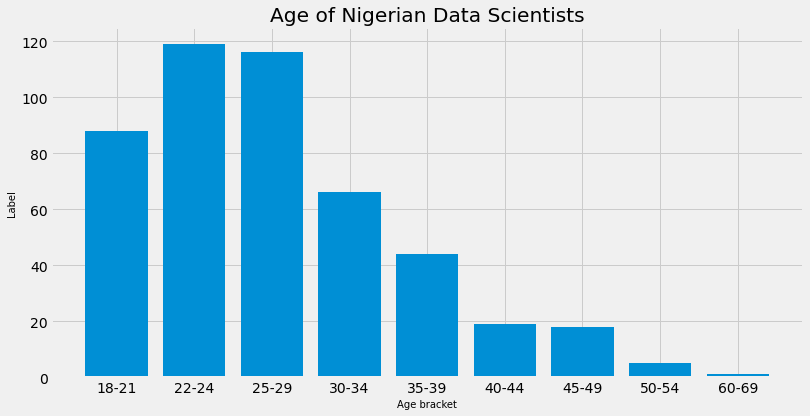

In [33]:
data_q1 = data_nig['Q1'].value_counts().sort_index()

plt.style.use("fivethirtyeight")
plt.figure(figsize = (12, 6))
plt.bar(data_q1.index, data_q1)

plt.title("Age of Nigerian Data Scientists")
plt.xlabel("Age bracket", fontsize = 10)
plt.ylabel("Label", fontsize = 10)

plt.show()


The highest occuring age bracket is 22-24.

The bar chart also shows that majority of Data Scientists in nigeria are young people, but the field is not restricted to them as we see older people within the agesof 60-69. The field people of all ages 

# Q2: Gender

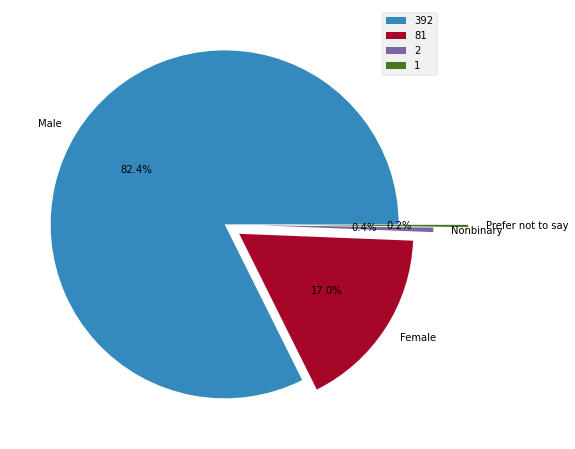

In [22]:
explode = [0, 0.1, 0.2, 0.4]
labels = ["Male", "Female", "Nonbinary", "Prefer not to say"]
data_q2 = data_nig['Q2'].value_counts()
plt.style.use('bmh')
plt.figure(figsize = (10,8))
plt.pie(data_q2, labels = labels, autopct = '%1.1f%%', explode = explode)

plt.legend(data_q2)
plt.show()

We have more men in the Data Science Community, than females and other genders. This shows that the field is open to different kinds of people but more needs to be done about the representation of minority genders.

Let's compare the gender of 2020 to that of 2019 to see if there's an increase in minority genders
The 2019 dataset can be found here! https://www.kaggle.com/c/kaggle-survey-2019/data

In [8]:
# reading the 2019 dataset
data_2019  = pd.read_csv(r"C:\Users\VICTOR JOY\Downloads\kaggle-survey-2019\multiple_choice_responses.csv", low_memory=False)


<ipython-input-8-14377e81c8ef>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_nig_2019 = data_2019[1:][data_2019["Q3"] == "Nigeria"]


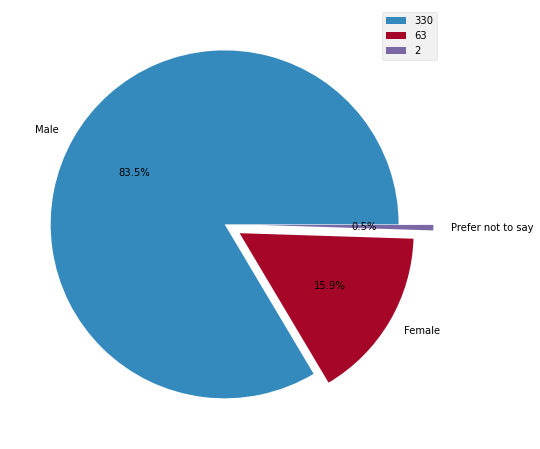

In [8]:
# extracting the data of Nigerian Kagglers and creating a similar plot

data_nig_2019 = data_2019[1:][data_2019["Q3"] == "Nigeria"]

explode = [0, 0.1, 0.2]
labels = ["Male", "Female", "Prefer not to say"]
data_q2_2019 = data_nig_2019['Q2'].value_counts()
plt.style.use('bmh')
plt.figure(figsize = (10,8))
plt.pie(data_q2_2019, labels = labels, autopct = '%1.1f%%', explode = explode)

plt.legend(data_q2_2019)
plt.show()

Nice! We see an influx of women into Data Science. From 15.9% in 2019 to 17.0%, though a little margin, it shows women are welcome in the field. 

# Q4: LEVEL OF QUALIFICATION

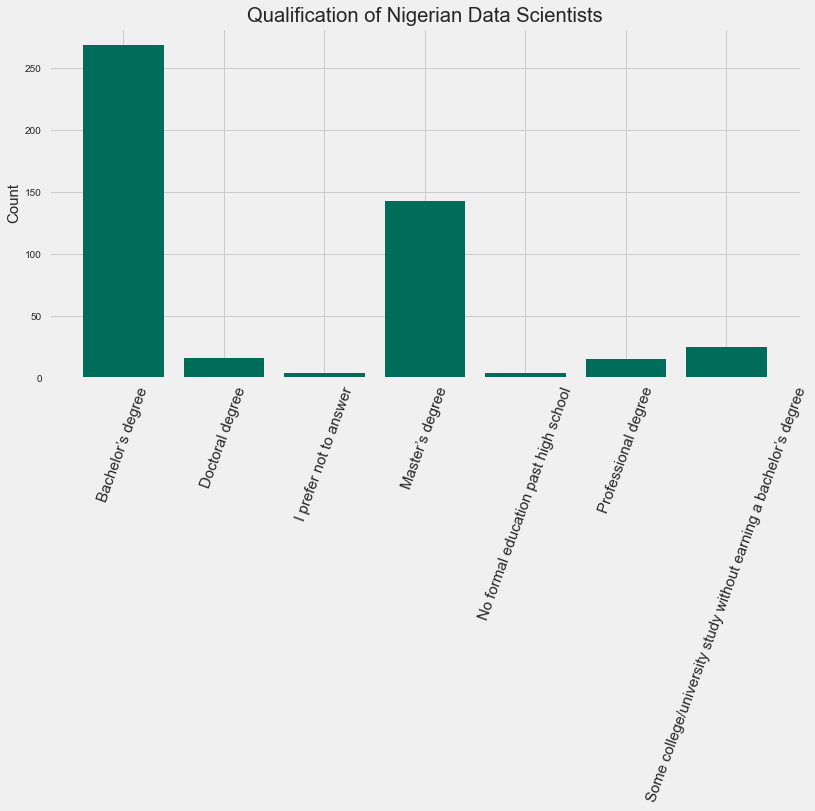

In [38]:
data_q1 = data_nig['Q4'].value_counts().sort_index()


plt.style.use("fivethirtyeight")
plt.figure(figsize = (12, 6))
plt.bar(data_q1.index, data_q1, color='#006D5B', )


plt.title("Qualification of Nigerian Data Scientists")
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation=70, fontsize = 15)

plt.show()

Majority of data scientists in Nigeria only have a Bachelor's degree, meaning a Doctoral in Data Science is cool but with a Bsc you can thrive in the field. 
The low amount of Doctoral Degree holders in Data Science in Nigeria can also be attributed to the fact that the field is relatively new in Nigeria and there are few institutions of learning that give a Doctoral degree.

# Q5: Current Role

The next question we are going to answer are the potential job roles for a data scientist.

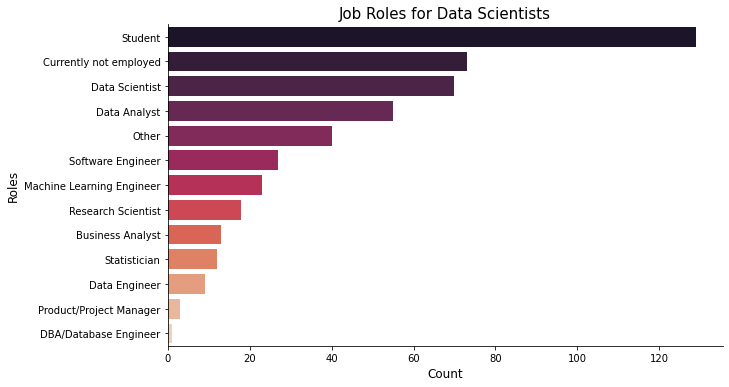

In [16]:
g = sns.catplot(data = data_nig, y = 'Q5', kind = 'count', palette = 'rocket', aspect = 2, order = data_nig['Q5'].value_counts().index)
plt.title('Job Roles for Data Scientists', fontsize = 15)
plt.ylabel('Roles', fontsize = 12)
plt.xlabel('Count', fontsize = 12)
plt.show()


We see, a very high number of Data Scientists that are students or unemployed. Could this be related to their experience in data science? Probably they're are just newbies coming into the field? 
Let's visualize the relationship between Job Roles and Work Experience to get "data-driven answers"

# Q6: Years of Experience

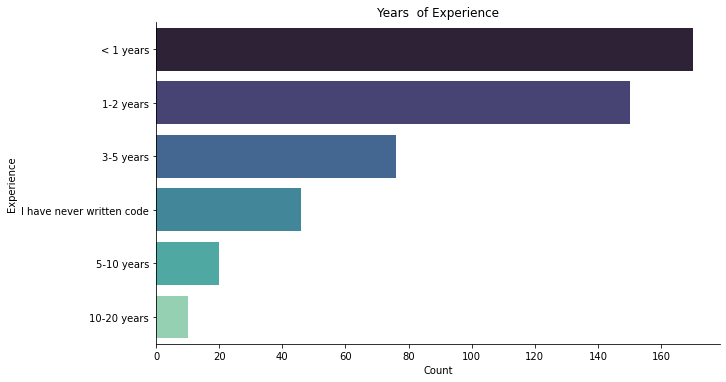

In [5]:
# let's visualize years of experience first before the relationship between it and Job roles
g = sns.catplot(data = data_nig, y = 'Q6', kind = 'count', palette = 'mako', aspect = 2, order = data_nig['Q6'].value_counts().index)
plt.title('Years  of Experience')
plt.ylabel('Experience')
plt.xlabel('Count')
plt.show()

# Relationship Between Job Roles and Years of Experience

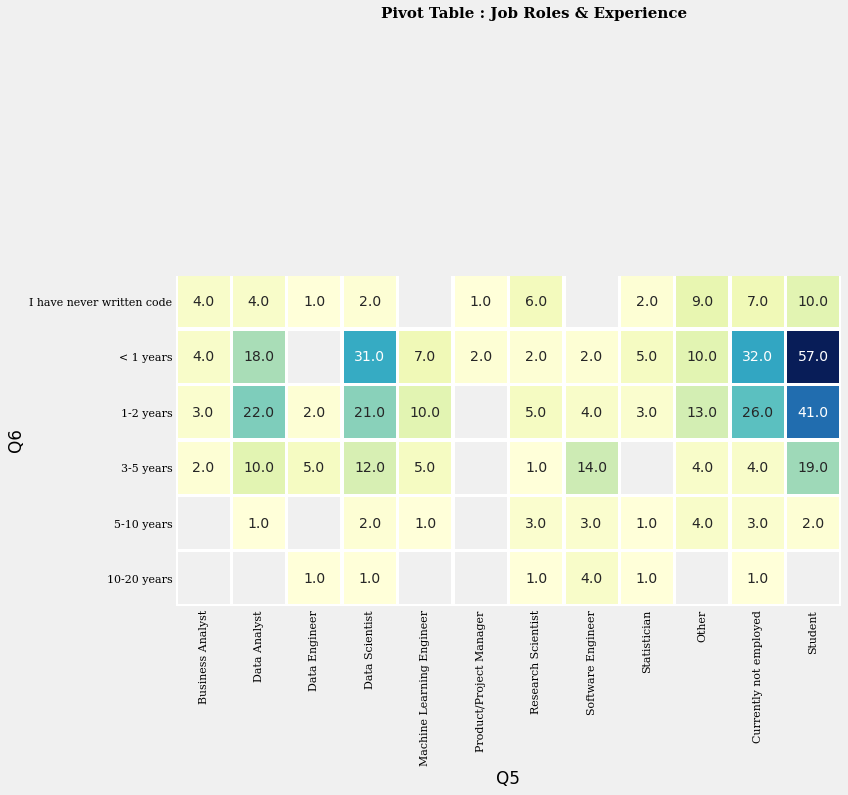

In [27]:

q5_order = ["Business Analyst", "Data Analyst", "Data Engineer", "Data Scientist",\
            "Machine Learning Engineer", "Product/Project Manager", "Research Scientist", "Software Engineer",\
            "Statistician", "Other", "Currently not employed", "Student"]

q6_order = [
      'I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years']


data_nig['count'] = 1 
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(pd.pivot_table(data_nig, values='count', index=['Q6'], columns=['Q5'], aggfunc=np.sum).loc[q6_order, q5_order], 
            cmap="YlGnBu",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt=".1f"
           )

ax.spines['top'].set_visible(True)

fig.text(0.45, 1, 'Pivot Table : Job Roles & Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

The large number of students necessitated the need to find out if Data Science jobs actually exist.
The visualization proves that job roles like Data Engineer, Machine Learning Engineer, Data Scientists exist in Nigeria but the challenge we have is skilled work force. We have lots of people with less than a year of exprience which explains why most of them are students.

Worthy of Note: From the heat map above, we see irregularities (outliers). A person with less than a year of experience can also be a Data Analyst. Bottom line is, opportunities exist, you just have to beskilled enough to get them!

# Q7: Programming Language

As a Data Science newbie choosing the right programming language is very important. Here are the popular languages used by Nigerian Data Scientists.

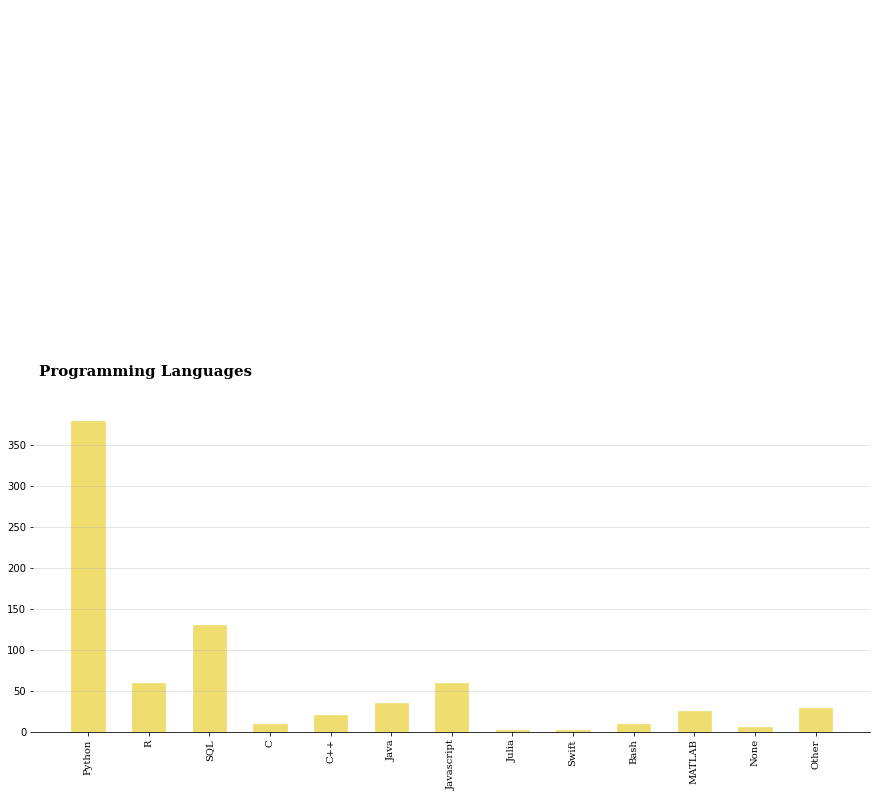

In [6]:
# The response for programming languages appear in several columns ie Q7_Part_1, Q7_Part_2 etc so we have to group the columns together to get the responses

data_q7 = data_nig[[i for i in data_nig.columns if 'Q7' in i]]
data_q7_count = pd.Series(dtype='int')
for i in data_q7.columns:
    data_q7_count[data_q7[i].value_counts().index[0]] = data_q7[i].count()
    


# main plot
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(data_q7_count.index, data_q7_count, width=0.55, color = "#EFDD6F",
       edgecolor='#EFDD6F', linewidth=0.7)
for i in data_q7_count.index:
    ax.annotate(f"{data_q7_count[i]}", 
                   xy=(i, data_q7_count[i] + 500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q7_count.index, fontfamily='serif', rotation = 90)
fig.text(0.13, 0.95, 'Programming Languages', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    


plt.show()

Python is the most popular programming language followed by SQL, so if you want to become a Data Scientist, Python is your best bet.
Python is a programming language with extensive libraries and a huge community. It's pretty inexpensive and easy to learn. It can be used for Data Science, Machine Learning, Web Development, Automation and Cloud computing.


# Q11:  Computing Platform to use

Most tech numbies are bothered by the computing hardware they use, let's find out if this is a factor that can impede one's learning

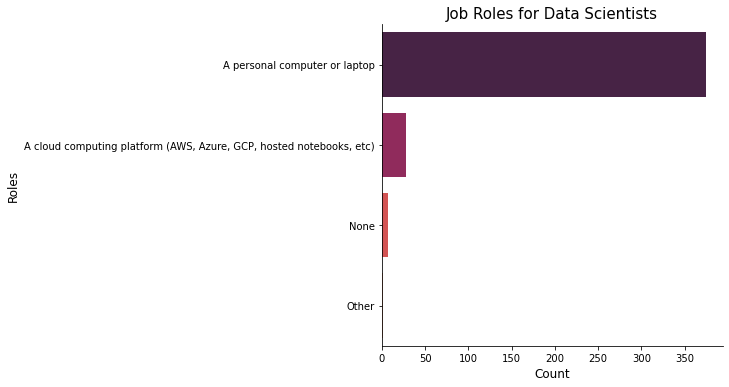

In [7]:
g = sns.catplot(data = data_nig, y = 'Q11', kind = 'count', palette = 'rocket', aspect = 2, order = data_nig['Q11'].value_counts().index)
plt.title('Computing Hardware', fontsize = 15)
plt.ylabel('Roles', fontsize = 12)
plt.xlabel('Count', fontsize = 12)
plt.show()

The options for this question includes
● A personal computer or laptop
● A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)
● A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)
● None
● Other

Notice: There was no response for a deep learning workstation.
The substantial response from, "A personal computer or laptop" proves that you don't need to bother much about hardware when you start learning Data Science. A personal computer and a cloud computing platform can give you the headstart you need. 

# Q9: IDEs?

What IDEs should I use?

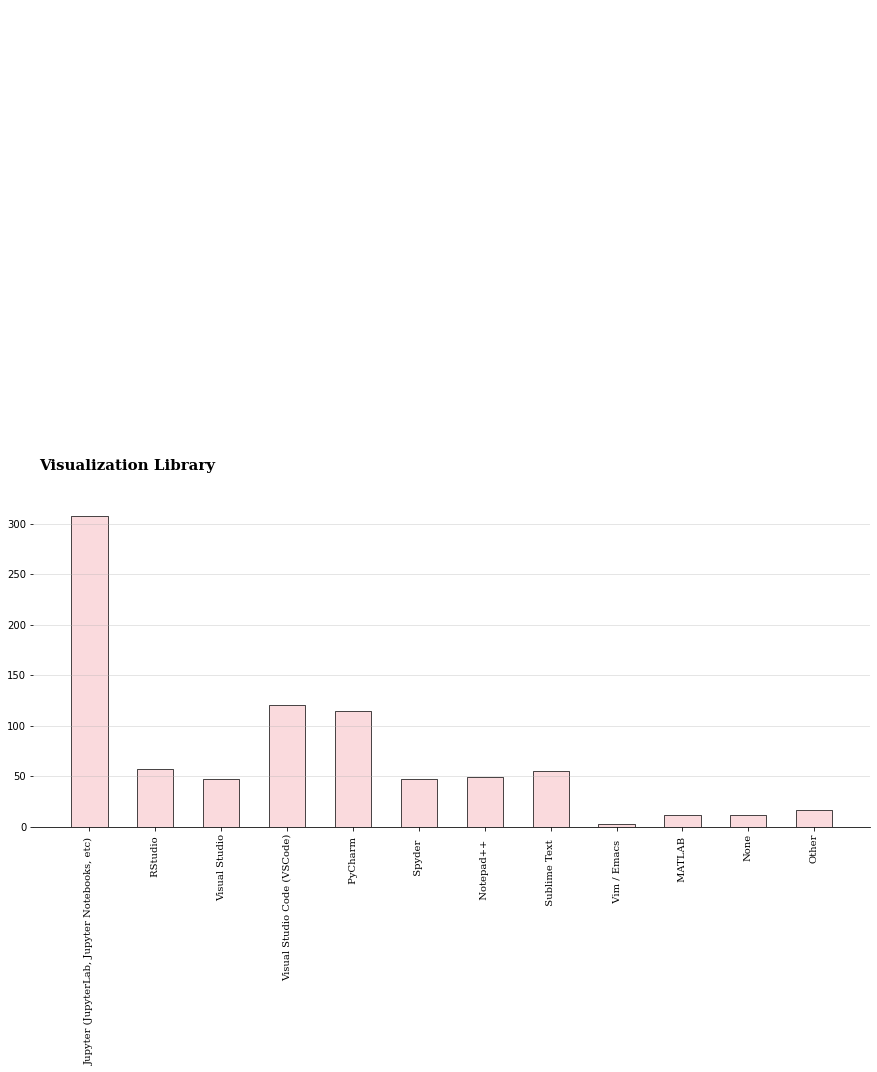

In [10]:
data_q9 = data_nig[[i for i in data_nig.columns if 'Q9' in i]]
data_q9_count = pd.Series(dtype='int')
for i in data_q9.columns:
    data_q9_count[data_q9[i].value_counts().index[0]] = data_q9[i].count()
    



fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(data_q9_count.index, data_q9_count, width=0.55, color = "#fadadd",
       edgecolor='black', linewidth=0.7)
for i in data_q9_count.index:
    ax.annotate(f"{data_q9_count[i]}", 
                   xy=(i, data_q9_count[i] + 500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q9_count.index, fontfamily='serif', rotation = 90)
fig.text(0.13, 0.95, 'Visualization Library', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    


plt.show()

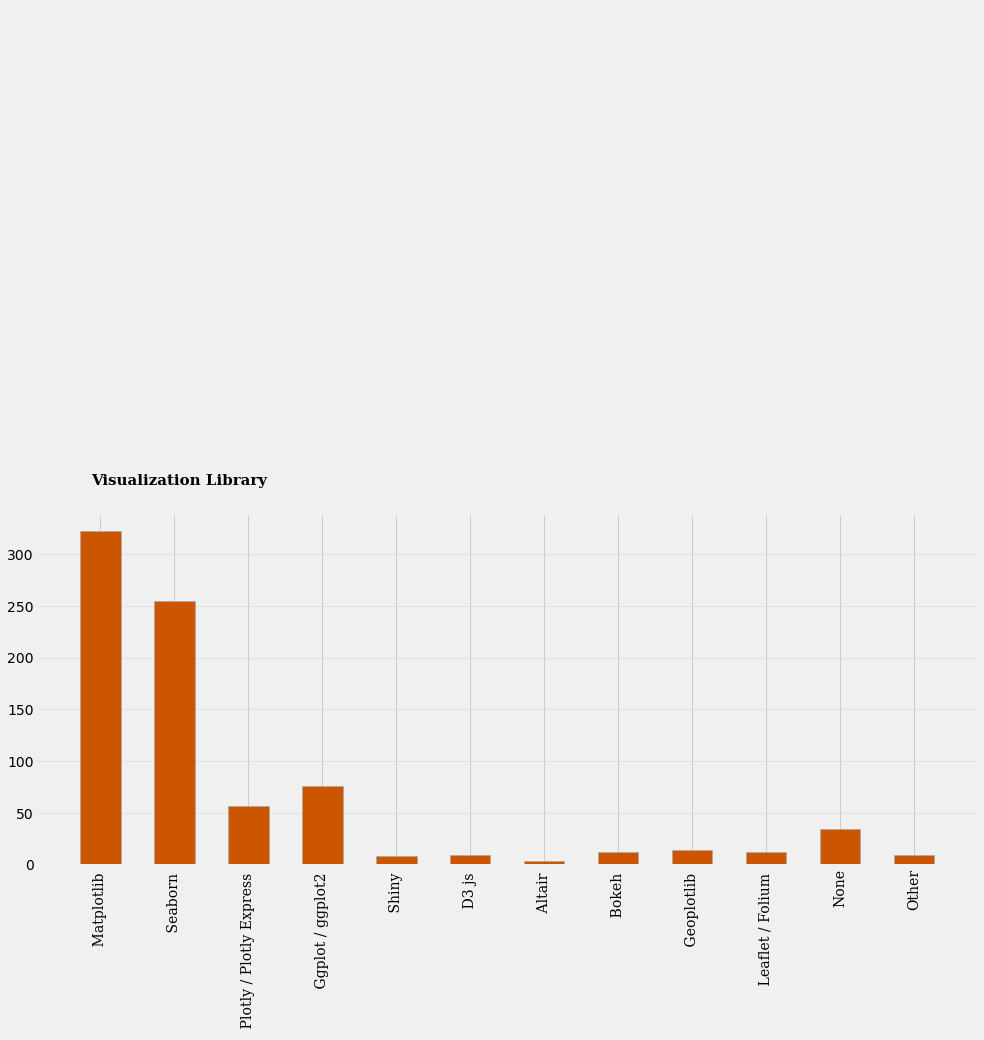

In [43]:
data_q14 = data_nig[[i for i in data_nig.columns if 'Q14' in i]]
data_q14_count = pd.Series(dtype='int')
for i in data_q14.columns:
    data_q14_count[data_q14[i].value_counts().index[0]] = data_q14[i].count()
    
# Q14



fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(data_q14_count.index, data_q14_count, width=0.55, color = "#CC5500",
       edgecolor='darkgray', linewidth=0.7)
for i in data_q14_count.index:
    ax.annotate(f"{data_q14_count[i]}", 
                   xy=(i, data_q14_count[i] + 500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q14_count.index, fontfamily='serif', rotation = 90)
fig.text(0.13, 0.95, 'Visualization Library', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    


plt.show()

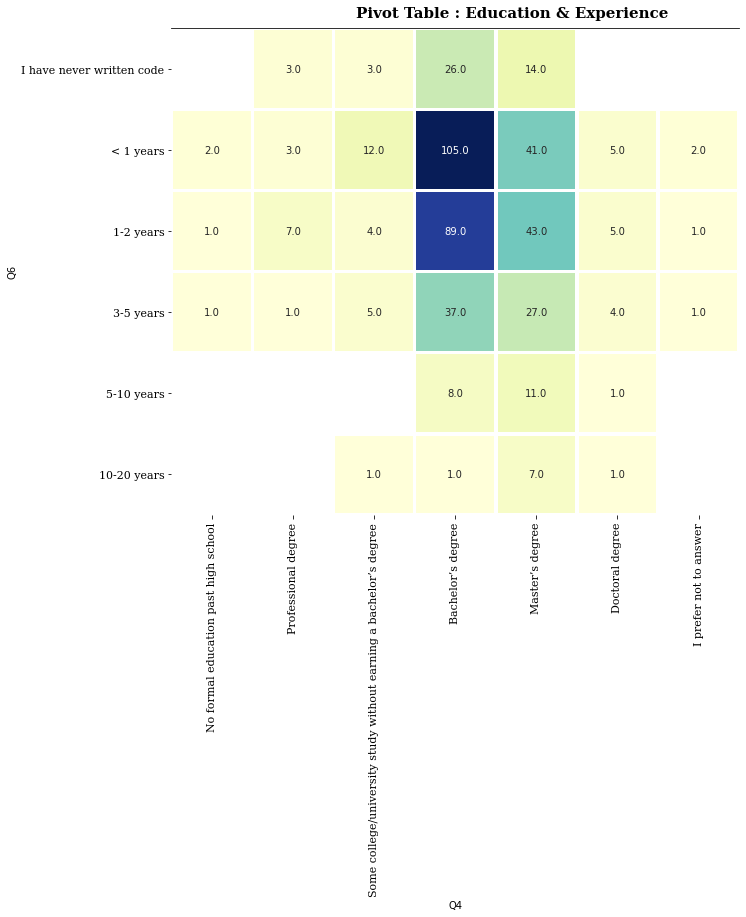

In [8]:
q4_order = [
    'No formal education past high school',
    'Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'I prefer not to answer'
]
q6_order = [
      'I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years'
]


data_nig['count'] = 1 
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(pd.pivot_table(data_nig, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order, q4_order], 
            cmap="YlGnBu",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt=".1f"
           )

ax.spines['top'].set_visible(True)

fig.text(0.48, 1, 'Pivot Table : Education & Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

Experience and earning

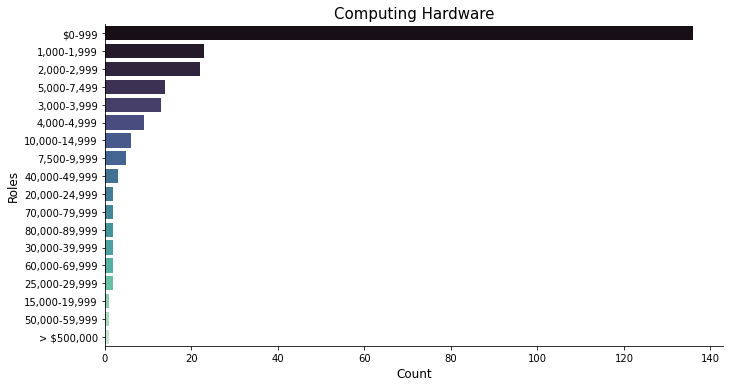

In [13]:
g = sns.catplot(data = data_nig, y = 'Q24', kind = 'count', palette = 'mako', aspect = 2, order = data_nig['Q24'].value_counts().index)
plt.title('Computing Hardware', fontsize = 15)
plt.ylabel('Roles', fontsize = 12)
plt.xlabel('Count', fontsize = 12)
plt.show()

In [9]:
data_qx = data_nig['Q24'].value_counts().sort_index()
print(data_qx)

$0-999           136
1,000-1,999       23
10,000-14,999      6
15,000-19,999      1
2,000-2,999       22
20,000-24,999      2
25,000-29,999      2
3,000-3,999       13
30,000-39,999      2
4,000-4,999        9
40,000-49,999      3
5,000-7,499       14
50,000-59,999      1
60,000-69,999      2
7,500-9,999        5
70,000-79,999      2
80,000-89,999      2
> $500,000         1
Name: Q24, dtype: int64


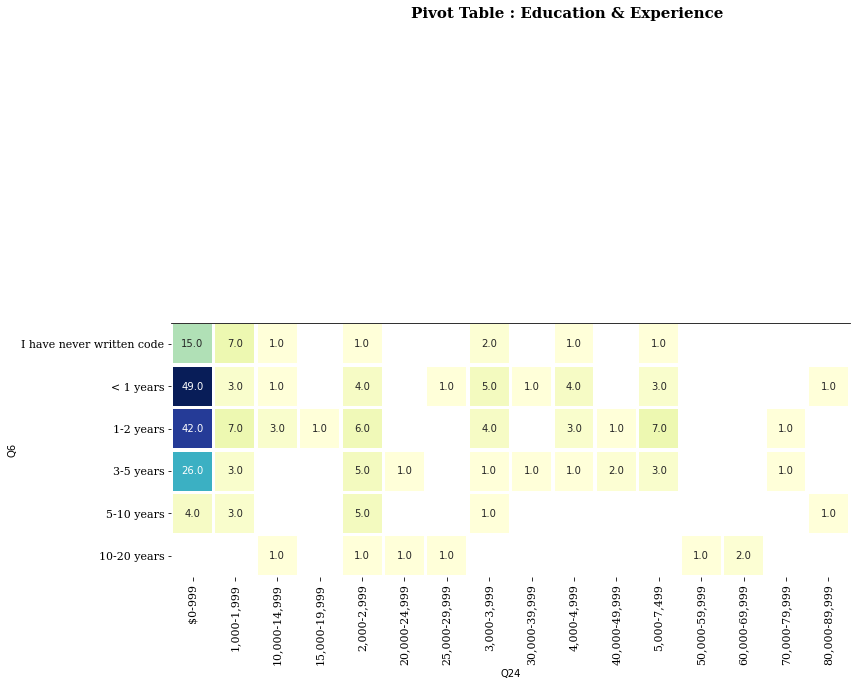

In [14]:
q24_order = [
    "$0-999", "1,000-1,999", "10,000-14,999", "15,000-19,999", "2,000-2,999", "20,000-24,999", "25,000-29,999", "3,000-3,999",\
    "30,000-39,999", "4,000-4,999", "40,000-49,999", "5,000-7,499", "50,000-59,999", "60,000-69,999", \
    "70,000-79,999", "80,000-89,999"
]
q6_order = [
      'I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years'
]


data_nig['count'] = 1 
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(pd.pivot_table(data_nig, values='count', index=['Q6'], columns=['Q24'], aggfunc=np.sum).loc[q6_order, q24_order], 
            cmap="YlGnBu",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt=".1f"
           )

ax.spines['top'].set_visible(True)

fig.text(0.48, 1, 'Pivot Table : Earning & Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()